Simplyhired.com EDA


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px
import plotly.graph_objects as go
import re

In [2]:
df = pd.read_csv('SimplyHiredCleanData.csv')

In [3]:
df.head()

,title,salary,company,description,location,city,state
0,data analyst,110000.0,cognizant technology solutions,perform data analysis on large volume of healt...,"['detroit', ' mi']",detroit,mi
1,data analyst/statistician,77749.0,us department of veterans affairs,create processes for assessing quality and acc...,"['ann arbor', ' mi']",ann arbor,mi
2,data analyst,110000.0,best egg,"in addition to semi-monthly salary payments, t...",['remote'],remote,NaN
3,data analyst,104000.0,integrityatl,to do well in this role you need a very fine e...,['united states'],united states,NaN
4,program associate i - data analyst,74395.0,dpscd,demonstrated success in analyzing and interpre...,"['detroit', ' mi']",detroit,mi


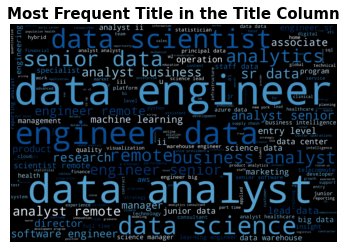

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(width = 3000, height = 2000, colormap="Blues").generate(" ".join(df.title))
plt.imshow(wordcloud,interpolation="bilinear")
plt.title('Most Frequent Title in the Title Column', fontsize=15, color ="black", fontweight="bold")
plt.axis('off')
plt.show()

In [9]:
df['title'] = df['title'].str.lower()
df.groupby('title').size().sort_values(ascending=False)
df_count = pd.DataFrame(df.groupby('title').size().sort_values(ascending=False).rename('Count').reset_index())
df_count

,title,Count
0,data engineer,342
1,data analyst,236
2,data scientist,79
3,senior data engineer,64
4,business analyst,46
...,...,...
1686,data engineer/senior data engineer,1
1687,data engineer/scientist – development program,1
1688,data engineer/data warehouse developer,1
1689,data engineer/data scientist @ remote work (on...,1


Text(0.5, 1.0, 'Top 10 most popular job title')

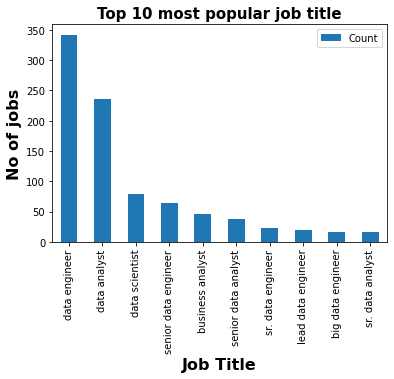

In [11]:
df_count[:10].plot(x='title',y='Count',kind='bar')
plt.ylabel('No of jobs',fontsize=16,color='black', fontweight="bold")
plt.xlabel('Job Title',fontsize=16,color='black', fontweight="bold")
plt.title('Top 10 most popular job title', fontsize=15, color ="black", fontweight="bold")


In [14]:
#Lets find the salaray range for Data Engineers roles
df.where(df["title"] == "data engineer").salary.mean()

119735.79798431185

In [17]:
de = df.groupby('company')['title'].count().sort_values(ascending = False).head(10)
pd.DataFrame({'count':dd})

,count
company,
indeed,44
amazon.com services llc,33
tiktok,29
microsoft,24
home depot / thd,21
spotify,20
optum,15
unitedhealthcare,14
pcs global tech,14


Text(0.5, 1.0, 'Top 10 companies in data science jobs')

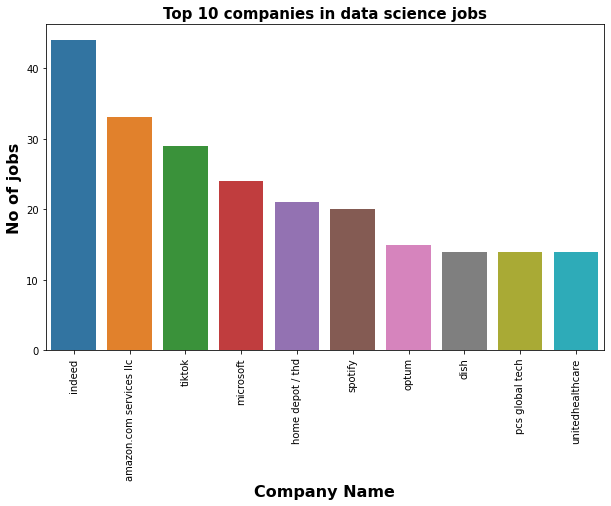

In [20]:
from matplotlib.pyplot import figure, show
import matplotlib.pyplot as plt
fig,a=plt.subplots(figsize=(10,6))   
sns.barplot(data=df.groupby('company').count().nlargest(10, 'title').reset_index(), x ='company', y='title')
a.set_xticklabels(df.groupby('company').count().nlargest(10, 'title').reset_index()['company'],rotation=90)   
a.set_ylabel('No of jobs',fontsize=16,color='black', fontweight="bold")
a.set_xlabel('Company Name',fontsize=16,color='black', fontweight="bold")
plt.title('Jobs Based on State', fontsize=15, color ="black", fontweight="bold")
plt.title('Top 10 companies in data engineer jobs', fontsize=15, color ="black", fontweight="bold")


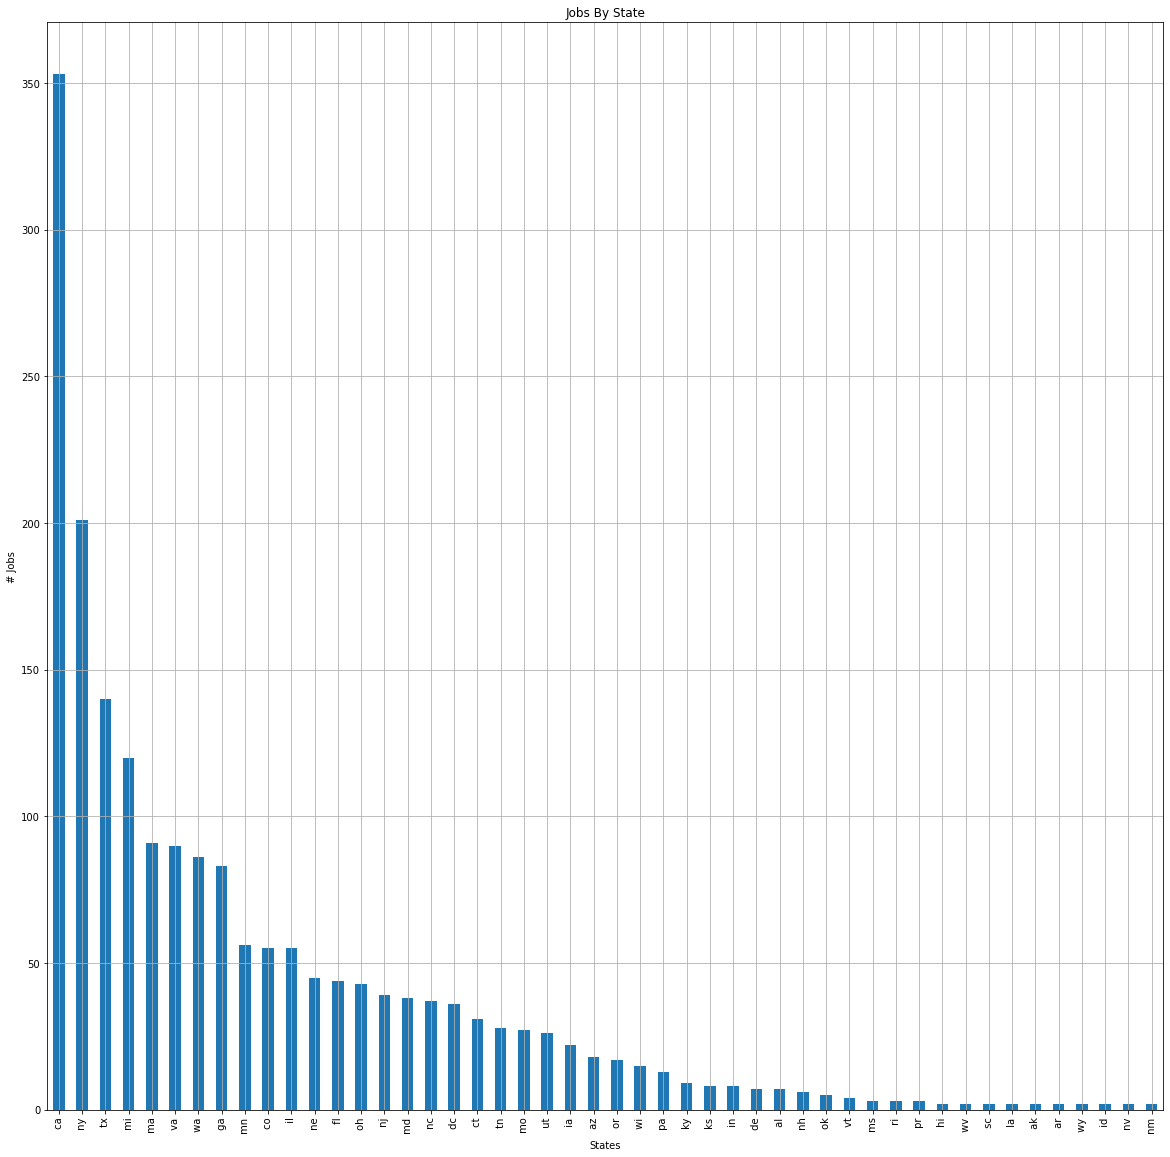

In [6]:
from matplotlib import pyplot as plt
#
state_group = df.state.value_counts()
fig = plt.figure(figsize = (20,20))
state_group.plot.bar()
plt.title('Jobs By State')
plt.xlabel("States")
plt.ylabel("# Jobs")
plt.grid()
plt.show()

In [7]:
df['is_remote'] = np.where(df['location'].str.contains('remote'),1,0)
df

,title,salary,company,description,location,city,state,is_remote
0,data analyst,110000.000000,cognizant technology solutions,perform data analysis on large volume of healt...,"['detroit', ' mi']",detroit,mi,0
1,data analyst/statistician,77749.000000,us department of veterans affairs,create processes for assessing quality and acc...,"['ann arbor', ' mi']",ann arbor,mi,0
2,data analyst,110000.000000,best egg,"in addition to semi-monthly salary payments, t...",['remote'],remote,NaN,1
3,data analyst,104000.000000,integrityatl,to do well in this role you need a very fine e...,['united states'],united states,NaN,0
4,program associate i - data analyst,74395.000000,dpscd,demonstrated success in analyzing and interpre...,"['detroit', ' mi']",detroit,mi,0
...,...,...,...,...,...,...,...,...
2993,"postdoctoral fellow, data science rwe advanced...",115871.092967,johnson & johnson,"at johnson & johnson, we use technology and th...",['united states'],united states,NaN,0
2994,sr associate data scientist (remote),128250.000000,"the travelers companies, inc.","who are we? taking care of our customers, our ...","['hartford', ' ct']",hartford,ct,0
2995,data analyst with databricks,130000.000000,datapattern,* work with stakeholders such as business user...,['remote'],remote,NaN,1
2996,research statistician,115871.092967,the geneva foundation,overview: the geneva foundation is a non-profi...,"['san antonio', ' tx']",san antonio,tx,0


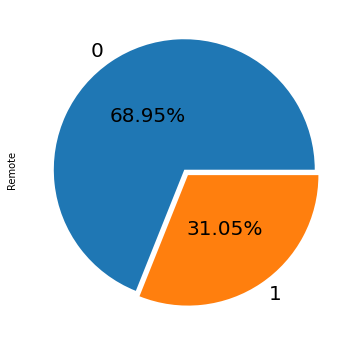

In [8]:
separate = [0, 0.05]
pie = df['is_remote'].value_counts().plot.pie(
            explode=separate,
            autopct=(lambda p : '{:.2f}%'.format(p)),
            fontsize=20,label='Remote', pctdistance=0.5,
            figsize=(6, 6))